# CoreMS Tutorial

`CoreMS` framework for mass spectrum


### 1. Import Bruker Transient File


m/z count 10588
first m/z 155.87356993477135 final m/z 999.6601693609396


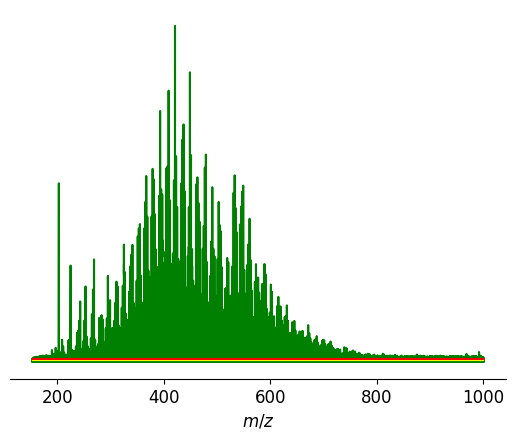

In [1]:
import sys
import os
from pathlib import Path
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.transient.input.brukerSolarix import ReadBrukerSolarix

sys.path.append("../../")
data_path = Path(os.getenv("COREMS_DATA_PATH", "/home/corems/data"))

# file_location = "/home/corems/data/ftms/ESI_NEG_SRFA.d"
file_location = data_path / "ftms" / "ESI_NEG_SRFA.d"

MSParameters.transient.apodization_method = "Hanning"
MSParameters.transient.number_of_truncations = 0
MSParameters.transient.number_of_zero_fills = 1

MSParameters.mass_spectrum.noise_threshold_method = "relative_abundance"
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 1

# MSParameters.mass_spectrum.noise_threshold_method = 'signal_noise'
# MSParameters.mass_spectrum.noise_threshold_min_s2n = 50

# MSParameters.mass_spectrum.noise_threshold_method = 'auto'
# MSParameters.mass_spectrum.noise_threshold_min_std = 32

MSParameters.ms_peak.peak_min_prominence_percent = 1


def import_transient():
    with ReadBrukerSolarix(file_location) as bruker_transient:
        mass_spectrum = bruker_transient.get_mass_spectrum(
            plot_result=False, auto_process=True
        )

        mass_spectrum.plot_profile_and_noise_threshold()

        print("m/z count", len(mass_spectrum))

        print(
            "first m/z",
            mass_spectrum.mspeaks[0].mz_exp,
            "final m/z",
            mass_spectrum.mspeaks[-1].mz_exp,
        )

    return mass_spectrum


mass_spectrum = import_transient()

In [ ]:
# reader_obj = ReadMassList(file_location, isCentroid=True)
# reader_obj = ReadMassList(file_location)
# reader_obj = ReadMassList(file_location)
# reader_obj = ReadHDF_BoosterMassSpectrum(file_location, polarity)

### 2. Import Centroid Mass List Files


10946487.4 162001.60117668353
3202


/home/corems/corems/mass_spectrum/input/baseClass.py:311: UserWarning: auto settings loading is enabled but could not locate the file:  /home/corems/data/ftms/ESI_NEG_ESFA.json. Please load the settings manually
  warnings.warn(


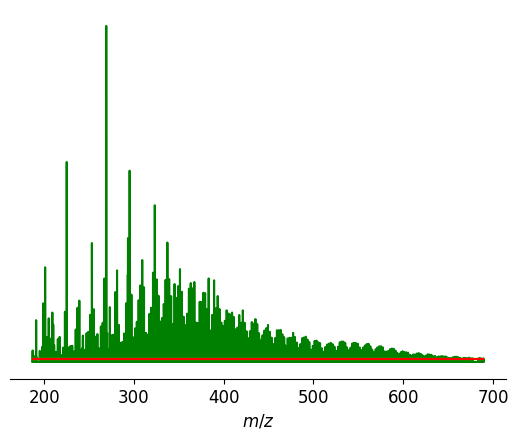

In [2]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Set noise threshold parameters before importing
from corems.encapsulation.factory.parameters import MSParameters

# Change from auto to relative_abundance method
# Auto was not implemented, signal_noise is another alternative
MSParameters.mass_spectrum.noise_threshold_method = "relative_abundance"
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 1

def import_centroid():
    file_location = data_path / "ftms" / "ESI_NEG_ESFA.ascii"
    
    mass_list_reader = ReadMassList(file_location)
    polarity = -1
    
    mass_spectrum = mass_list_reader.get_mass_spectrum(polarity, auto_process=True)
    
    print(mass_spectrum.baseline_noise, mass_spectrum.baseline_noise_std)
    print(len(mass_spectrum))
    mass_spectrum.plot_profile_and_noise_threshold()
    
    pyplot.show()
    return mass_spectrum

mass_spectrum = import_centroid()

1.0325090062111801 0.0267678148655616
16088


/home/corems/corems/mass_spectrum/input/baseClass.py:311: UserWarning: auto settings loading is enabled but could not locate the file:  /home/corems/data/ftms/SRFA.json. Please load the settings manually
  warnings.warn(


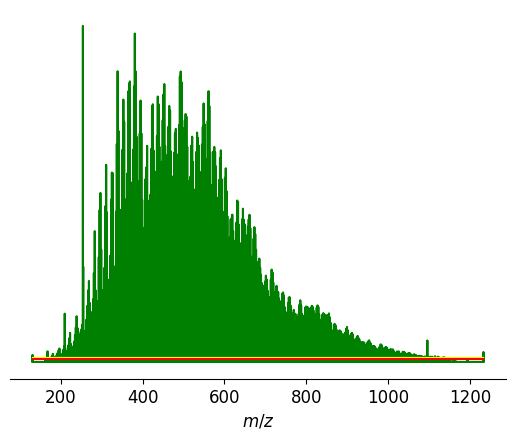

In [3]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Set noise threshold parameters before importing
from corems.encapsulation.factory.parameters import MSParameters

# Change from auto to relative_abundance method
# Auto was not implemented, signal_noise is another alternative
MSParameters.mass_spectrum.noise_threshold_method = "relative_abundance"
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 1

def import_centroid():
    file_location = data_path / "ftms" / "SRFA.pks"
    
    mass_list_reader = ReadMassList(file_location)
    polarity = -1
    
    mass_spectrum = mass_list_reader.get_mass_spectrum(polarity, auto_process=True)
    
    print(mass_spectrum.baseline_noise, mass_spectrum.baseline_noise_std)
    print(len(mass_spectrum))
    mass_spectrum.plot_profile_and_noise_threshold()
    
    pyplot.show()
    return mass_spectrum

mass_spectrum = import_centroid()

### 3. Access mass spectrum peak objects


In [5]:
kb = {"C": 1, "H": 2}

print(
    "m/z",
    "peak height",
    "resolving power",
    "S/N",
    "Kendrick Mass Defect",
    "Has Molecular Formula Obj",
)

for mspeak in mass_spectrum.sort_by_abundance():
    print(
        mspeak.mz_exp,
        mspeak.abundance,
        mspeak.resolving_power,
        mspeak.signal_to_noise,
        mspeak.kmd,
        mspeak.is_assigned,
    )

    mspeak.change_kendrick_base(kb)


m/z peak height resolving power S/N Kendrick Mass Defect Has Molecular Formula Obj
424.0181116366628 7578778.968644503 683610.6115556326 2.8021160393616418 -0.5446472772644029 False
358.0150951386134 7581209.532263782 809639.4011383057 2.7856241846623493 -0.6153306402987369 False
327.01817449011577 7600628.04350216 886187.7493994011 2.84559456538705 -0.6530215727109976 False
569.2033970594437 7661446.277046444 509131.41261097393 2.8107367815908177 -0.5678168463346083 False
260.0494239910839 7678319.536060135 891481.9449524542 2.8530908629776373 -0.7590492864124485 False
313.1083587701317 7689554.998774446 925760.1815616044 2.859837530809166 -0.7587377411261969 False
568.1184743439067 7707864.002654071 510104.0473575395 2.9051901312322213 -0.48410557017814426 False
372.0595310079616 7711924.636011179 779077.3004545136 2.84559456538705 -0.6440843025678191 False
589.1415113814639 7734881.820295601 492009.6577019024 2.855339752254814 -0.4836680001882314 False
622.0562249446367 7742336.3604

### 4. How to change settings


In [6]:
# Option 1. Before Mass Spectrum Creation
from corems.encapsulation.factory.parameters import MSParameters

# Data input
MSParameters.data_input.add_mz_label = "moz"

# Transient
MSParameters.transient.number_of_zero_fills = 1

# Mass Spectrum
MSParameters.mass_spectrum.min_calib_ppm_error = -1
MSParameters.mass_spectrum.max_calib_ppm_error = 1
MSParameters.mass_spectrum.noise_threshold_min_std = 2

# Molecular Formula Search
MSParameters.molecular_search.max_dbe = 40
MSParameters.molecular_search.min_dbe = 10

# Mass Spectrum Peak Obj
MSParameters.ms_peak.kendrick_base = {"C": 1, "H": 2}

# Option 2. After mass spectrum object is created you can manually change the settings inside the object:

# Mass Spectrum
mass_spectrum.settings.do_calibration = True

# Molecular Formula Search
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1
mass_spectrum.molecular_search_settings.mz_error_range = 1

mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 90)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (0, 25)
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 5)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass Spectrum Peak Obj
mass_spectrum.mspeaks_settings


MassSpecPeakSetting(kendrick_base={'C': 1, 'H': 2}, kendrick_rounding_method='floor', implemented_kendrick_rounding_methods=('floor', 'ceil', 'round'), peak_derivative_threshold=0.0, peak_min_prominence_percent=1.0, min_peak_datapoints=5.0, peak_max_prominence_percent=0.1, peak_height_max_percent=10.0, legacy_resolving_power=True, legacy_centroid_polyfit=False)

### 5. Mass spectrum calibration


Works with first cell, but seems to be missing a method declaration for SRFA.pks.

m/z count 10588
first m/z 155.87356993477135 final m/z 999.6601693609396
MS Obj loaded - 10588 peaks found.
Reference mass list loaded - 60 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.792 ppm
minimize function performed 369 fn evals and 6 iterations


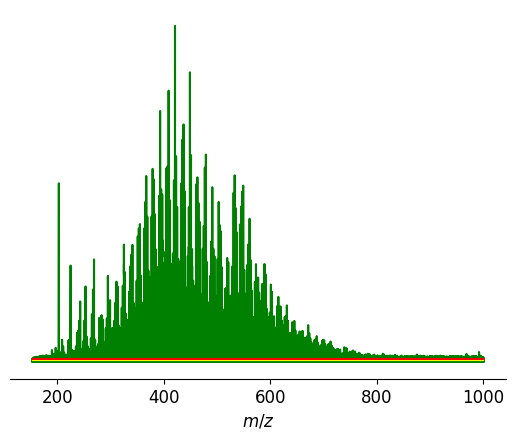

In [8]:
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

MSParameters.mass_spectrum.min_calib_ppm_error = -5
MSParameters.mass_spectrum.max_calib_ppm_error = 5
MSParameters.mass_spectrum.max_calib_ppm_error = 5


mass_spectrum = import_transient()

ref_file_location = data_path / "ftms" / "SRFA.ref"

MzDomainCalibration(mass_spectrum, ref_file_location).run()


### 6. Molecular formula search


In [38]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.molecular_id.factory.classification import HeteroatomsClassification

# mass_spectrum.molecular_search_settings.url_database = "path_to_db"

mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1

mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 50

mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isadduct = True

mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 90)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 25)
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 5)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()


'runworker'  141.15 ms


Loading molecular formula database: 523197it [01:11, 7279.66it/s] 
Started molecular formula search for class {"O": 1, "34S": 1}, (de)protonated :   0%|          | 1/300 [00:00<00:37,  7.88it/s]


TypeError: 'NoneType' object is not subscriptable

### 7. Accessing the molecular formula objects


In [28]:
mass_spectrum.sort_by_abundance()[:1]

In [34]:
# there is no mf in mspeaks
for mspeaks in mass_spectrum.sort_by_abundance()[:75]:
    for mf in mspeaks:
        # print("hello")
        print(mf.mz_calc, mf.dbe, mf.class_label, mf.string_formated)


626.9747455649791 17.0 O22 C₂₂H₁₂O₂₂
273.01617884720906 10.0 N2 S2 O1 C₁₃H₁₀O₁N₂S₂
575.113626529269 28.0 O7 C₃₇H₂₀O₇
761.4151369036689 6.0 S1 O13 C₃₈H₆₆O₁₃S₁
255.06225966071912 6.0 N2 O6 C₁₀H₁₂O₆N₂
852.817819859429 5.0 N1 O3 C₅₇H₁₀₇O₃N₁
508.97147305176907 15.0 N4 S2 O11 C₁₇H₁₀O₁₁N₄S₂
452.3534033060591 8.0 N1 O2 C₃₀H₄₇O₂N₁
626.193786896879 7.0 N1 O18 C₂₄H₃₇O₁₈N₁
879.441883959759 34.0 O4 C₆₃H₆₀O₄


In [21]:
mass_spectrum_by_classes.get_classes()

['O7',
 'O8',
 'O9',
 'O10',
 'O11',
 'S2 O8',
 'O12',
 'S2 O11',
 'O13',
 'S2 O10',
 'S2 O9',
 'O14',
 'S2 O12']

(<Axes: title={'center': 'O8, 2.82 %'}, xlabel='O/C', ylabel='H/C'>,
 2.8234843016225417)

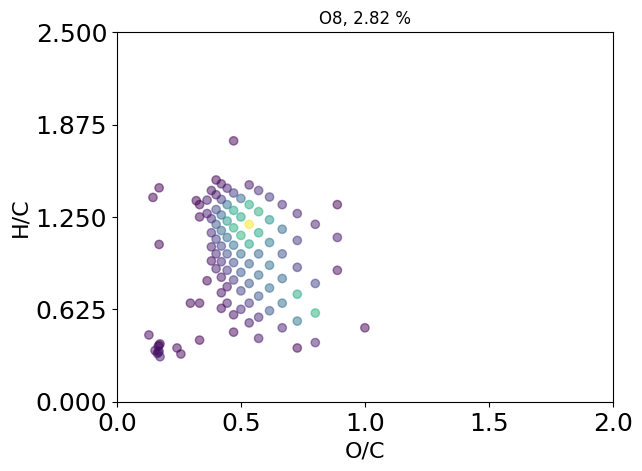

In [22]:
mass_spectrum_by_classes.plot_van_krevelen("O8")

(<Axes: title={'center': 'O8, 2.82 %'}, xlabel='Carbon number', ylabel='DBE'>,
 2.8234843016225417)

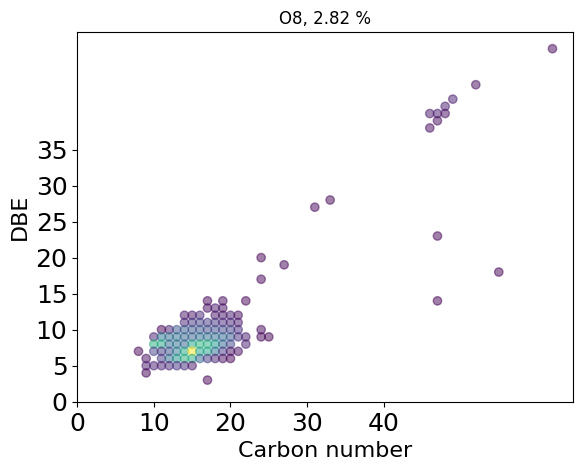

In [23]:
mass_spectrum_by_classes.plot_dbe_vs_carbon_number("O8")

<Axes: xlabel='m/z', ylabel='abundance'>

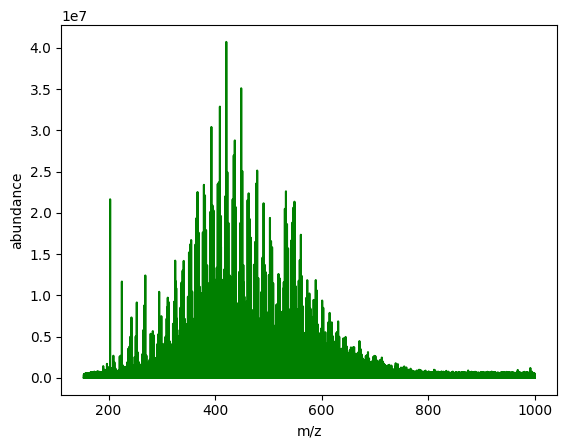

In [27]:
mass_spectrum.plot_mz_domain_profile()

### 8. Export the results


In [17]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "sample1.csv"
hdf_file = exports_dir / "sample1.h5"
pkl_file = exports_dir / "sample1.pkl"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))
mass_spectrum.to_hdf(str(hdf_file))
mass_spectrum.to_pandas(str(pkl_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()

### 9. Explore Dataframe

In [18]:
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,Mono Isotopic Index,Molecular Formula,C,H,O,N,S,13C,18O,34S
0,17,161.097156,161.097255,161.097189,501510.820471,74.120584,7.996116e+05,1.903278,-1,0.409092,...,NaN,C11 H14 O1,11.0,14.0,1.0,NaN,NaN,NaN,NaN,NaN
1,75,166.017940,166.017991,166.017952,513228.006693,183.165303,4.849446e+05,1.944810,-1,0.231393,...,NaN,C4 H9 O4 N1 S1,4.0,9.0,4.0,1.0,1.0,NaN,NaN,NaN
2,308,175.054765,175.054732,175.054672,503854.589940,107.552333,1.226427e+06,1.896076,-1,0.338042,...,NaN,C6 H12 O2 N2 S1,6.0,12.0,2.0,2.0,1.0,NaN,NaN,NaN
3,331,176.071703,176.071660,176.071702,511712.406395,65.110450,9.145080e+05,1.993544,-1,-0.238890,...,NaN,C10 H11 O2 N1,10.0,11.0,2.0,1.0,NaN,NaN,NaN,NaN
4,793,191.092680,191.092502,191.092497,475649.164565,60.985519,8.426225e+05,1.820693,-1,0.023213,...,NaN,C8 H16 O5,8.0,16.0,5.0,NaN,NaN,NaN,NaN,NaN


### 10. Bonus - Import Profile Mass List Files
**Needs troubleshooting**

_Wrong dataset? Wrong filereader?_
_Original reader had no run method_

533612.1518467666 2732015.3385739173
3878


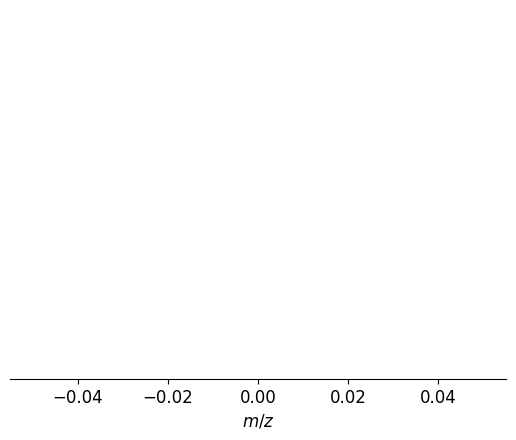

In [4]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList
from corems.mass_spectra.input.brukerSolarix import ReadBruker_SolarixTransientMassSpectra

# Set parameters before importing
MSParameters.mass_spectrum.noise_threshold_method = "relative_abundance"
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 1

# Test import_profile function
def import_profile():
    file_location = data_path / "ftms" / "NEG_ESI_SRFA_Auto.d"
    
    bruker_reader = ReadBruker_SolarixTransientMassSpectra(file_location)
    bruker_reader.run()
    mass_spectrum = bruker_reader.get_mass_spectrum(scan_number=1)
    
    print(mass_spectrum.baseline_noise, mass_spectrum.baseline_noise_std)
    print(len(mass_spectrum))
    mass_spectrum.plot_profile_and_noise_threshold()
    
    pyplot.show()
    return mass_spectrum


mass_spectrum = import_profile()